# Habitability of Exoplanets :


The target variable is **"P_HABITABLE"** which is having values 0 (inhabitable) or 1 (conservatively habitable) or 2 (optimistically habitable). Initially, we will also explore which interesting features are responsible for making an exoplanet (a planet outside our solar system) habitable. Then we will divide the data set into 80% training data and 20% testing data in order to judge performance of different classification models. 

In the end, we also experimented with unsupervised learning after removing the labels and checked whether it is really giving rise to three distinct clusters of planets or not.

**DATA ACKNOWLEDGEMENT: PHL's Exoplanet Catalog of the Planetary Habitability Laboratory @ UPR Arecibo.**

In [1]:
# Importing data
import pandas as pd
full_data = pd.read_csv('phl_exoplanet_catalog.csv')

In [2]:
full_data.head()

P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0    11 Com b       3.0  6165.86330        -476.74200         476.74200   
1    11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2    14 And b       3.0  1525.57440               NaN               NaN   
3    14 Her b       3.0  1481.07850         -47.67420          47.67420   
4  16 Cyg B b       3.0   565.73385         -25.42624          25.42624   

   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  ...  \
0       NaN                 NaN                 NaN    2007  2014-05-14  ...   
1       NaN                 NaN                 NaN    2009  2018-09-06  ...   
2       NaN                 NaN                 NaN    2008  2014-05-14  ...   
3       NaN                 NaN                 NaN    2002  2018-09-06  ...   
4       NaN                 NaN                 NaN    1996  2018-09-06  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0              0          Hot            0  0.083813   Coma Berenices   
1              0          Hot            0  0.082414       Ursa Minor   
2              0          Hot            0  0.081917        Andromeda   
3              0         Cold            0  0.145241         Hercules   
4              1         Warm            0  0.368627           Cygnus   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  \
0                  Com      Berenice's Hair     12.082709  6165.86330   
1                  UMi          Little Bear     12.229641  4684.78480   
2                  And            Andromeda     12.848516  1525.57440   
3                  Her             Hercules     12.865261  1481.07850   
4                  Cyg                 Swan     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 112 columns]

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


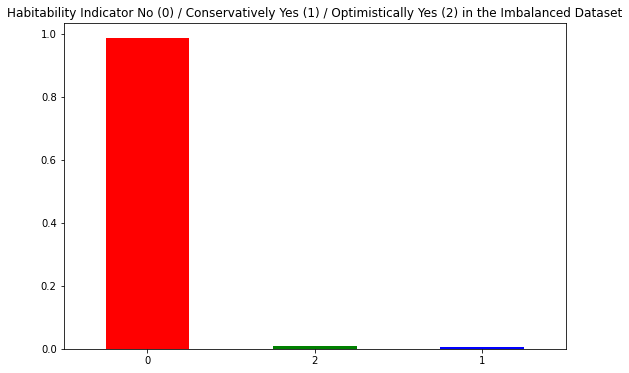

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
full_data.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['red','green','blue'], alpha = 1, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) in the Imbalanced Dataset')
plt.show()

In [5]:
full_data['P_HABITABLE'].value_counts(normalize=True)

0    0.986413
2    0.008399
1    0.005188
Name: P_HABITABLE, dtype: float64

* **Initial Exploration with DABL Library**

In [6]:
!pip install dabl

You should consider upgrading via the 'c:\users\anish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return False;
}

<IPython.core.display.Javascript object>

c:\Users\anish\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Target looks like classification
Showing only top 10 of 84 continuous features
Linear Discriminant Analysis training set score: 0.865


[[<Figure size 1440x432 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 288x288 with 1 Axes>],
 None]

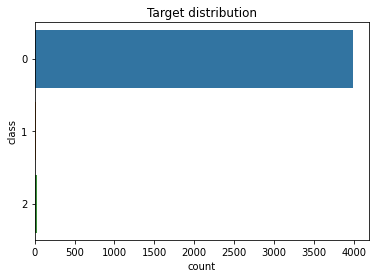

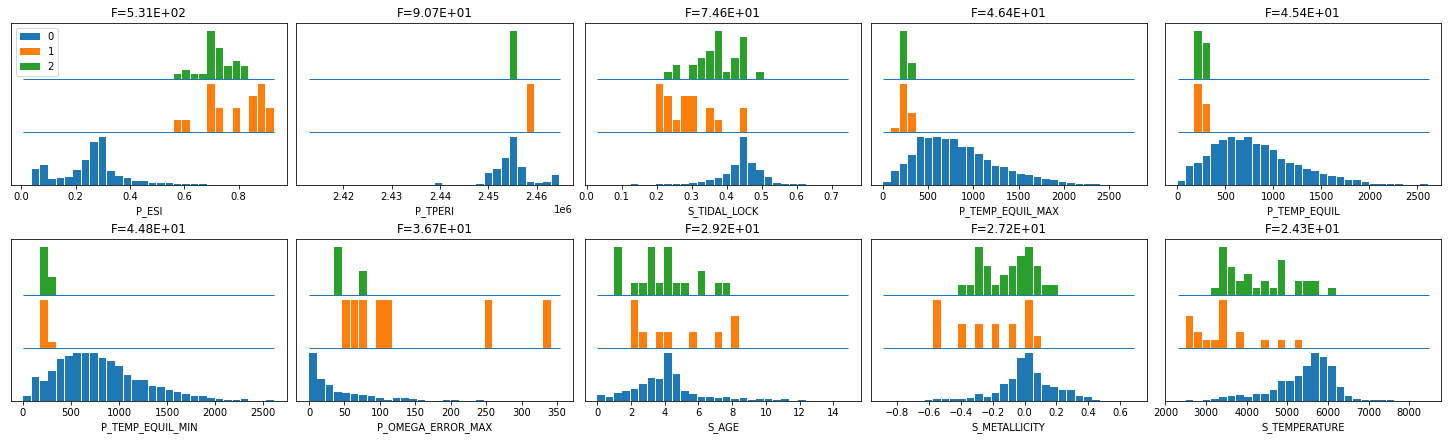

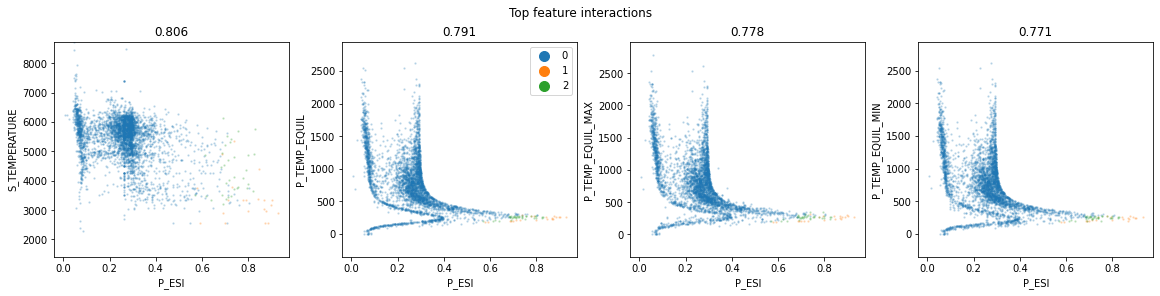

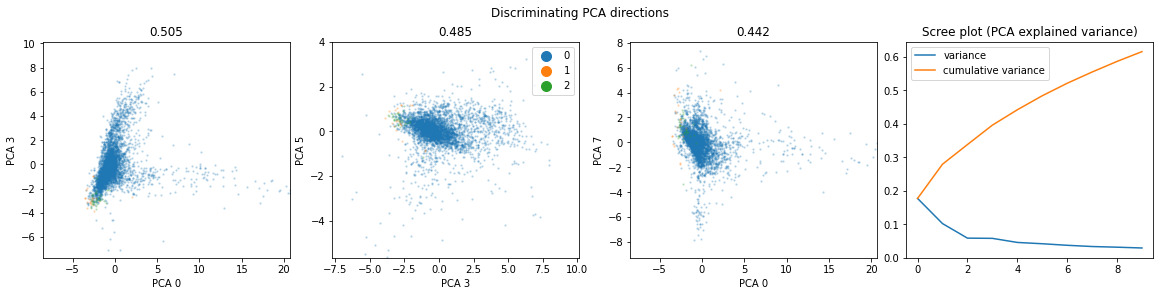

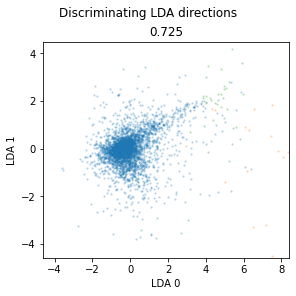

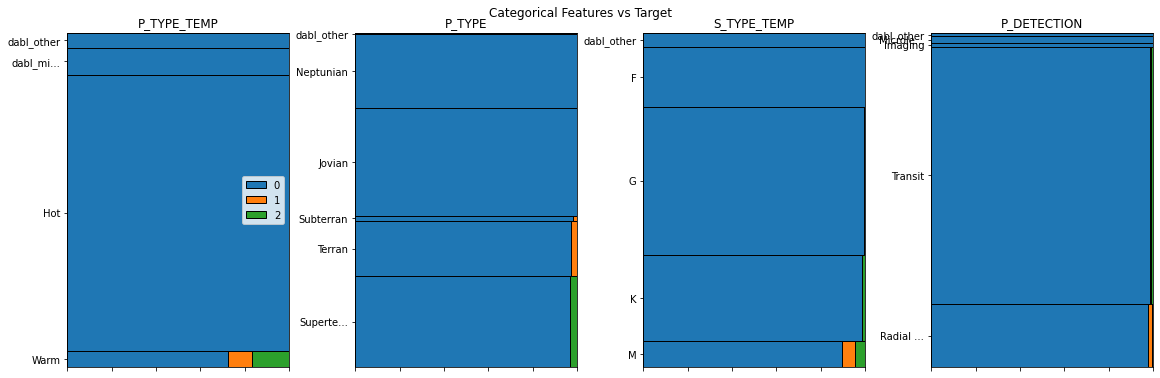

In [8]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
dabl.plot(full_data, target_col = 'P_HABITABLE')

# Resolving Class Imbalance with Simple Oversampling Strategy

Clearly the data set is imbalanced having 98.64% inhabitable planets. Only 0.84% and 0.52% are conservatively habitable and optimistically habitable planets respectively. For getting proper performance of the ML models, we need to balance the data set first where each class will be having the same proportion of representation. We are using simple oversampling technique (resampling strategy) for that.

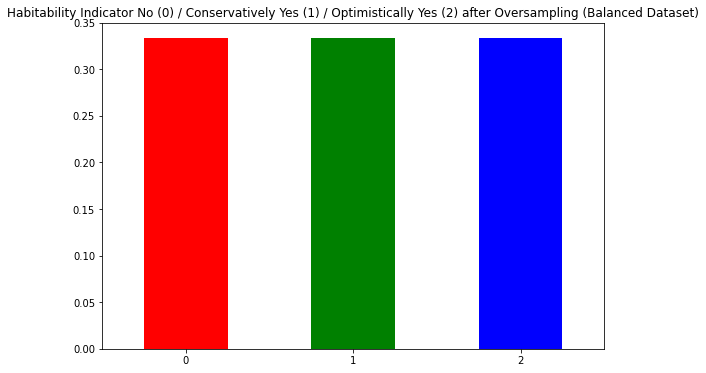

In [9]:
from sklearn.utils import resample

no = full_data[full_data.P_HABITABLE == 0]
yes_cons = full_data[full_data.P_HABITABLE == 1]
yes_opti = full_data[full_data.P_HABITABLE == 2]
yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([no, yes_cons_oversampled])
yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

fig = plt.figure(figsize = (9,6))
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['red','green','blue'], alpha = 1, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) after Oversampling (Balanced Dataset)')
plt.show()

In [10]:
oversampled['P_HABITABLE'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: P_HABITABLE, dtype: float64

Now we can observe that each class is having equal proportion of representation in the oversampled data set.

# Data Analysis through Visualization :

* **Planetary Detection Method:**

We will explore which planetary detection methods have been used extensively (by the word "extensive" we assume: more than 5 planets have been discovered using the method) over the years for discovering exoplanets.

Notably, maximum number of conservatively habitable exoplanets have been discovered in 2013, 2017, 2019 respectively. And maximum number of optimistically habitable exoplanets have been discovered in 2014 and 2016 respectively.

* **Earth Similarity Index of a Planet and Influence on Habitability :**

Next, we will check for different planet type, how planet thermal type is influencing the earth similarity index, and whether a high earth similarity index (P_ESI) indicates a high possibility of habilitability or not. Interested folks can check the definition of earth similarity index below.

*P_ESI:* The Earth Similarity Index is an open multiparameter measure of Earth-likeness for solar or extrasolar planets as a number between zero (no similarity) and one (identical to Earth) **(*Schulze-Makuch et al., 2011*)**. For more details, please visit [this link](http://phl.upr.edu/projects/earth-similarity-index-esi#:~:text=The%20Earth%20Similarity%20Index%20(ESI,et%20al.%2C%202011).).

We infer that a high earth similarity index of an exoplanet actually corroborates with high possibility of habitability. For superterran planet type, when the planet thermal type is warm, it indicates a high number of optimistically habitable planets. For terran planet type, when planet thermal type is warm, it indicates a high number of conservatively habitable planets.

* **Stellar Constellations having Potentially Habitable Planets :**

Next, we will check the names of star constellations where most of the habitable exoplanets belong.

In [11]:
# label_size = 10
# plt.rcParams['xtick.labelsize'] = label_size 
# chart = sns.catplot(
#     data=oversampled[oversampled['P_HABITABLE'].isin([1,2])],
#     x='S_CONSTELLATION',
#     kind='count',
#     palette='pastel',
#     col='P_HABITABLE',
#     aspect=1.2,
# )
# chart.set_xticklabels(rotation=65, horizontalalignment='right')

We observe that solar constellation *Aquarius* has the maximum number of conservatively habitable exoplanets. *Cygnus* and *Lyra* have the maximum number of optimistically habitable exoplanets respectively. 

* **Time Frame when Planets with High ESI Discovered :**

Well, now we will scrutinize the exact time frame when planets with high Earth Similarity Index (ESI) have been discovered.

In [12]:
# p_plot = sns.catplot(x="P_YEAR", y="P_ESI", hue="P_HABITABLE", kind="point", data=oversampled, aspect=2.0)
# p_plot.set_xticklabels(rotation=65)

Till 2011, only non-habitable planets having ESI less than or equal to 0.3 were discovered. From 2011 till 2019, habitable planets having high ESI (hovering in the range 0.6 - 0.9) have been discovered.

* **Influence of Planet Mass / Planet Radius / Planet Eccentricity on Habitability:**

Next, we will check how planet mass, planet radius and planet eccentricity influence habitability. While understanding mass and radius are pretty simple, understanding eccentricity can be difficult for some. Below is the definition of eccentricity for reference. 

[Eccentricity](https://www.enchantedlearning.com/subjects/astronomy/glossary/Eccentricity.shtml) indicates how the planetary orbit deviates from a perfect circle. A perfectly circular orbit has an eccentricity = 0. A higher number indicates elliptical orbit. 

In [13]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled.P_MASS, y=oversampled.P_ESI, color=oversampled.P_HABITABLE,
                 hover_name=oversampled.P_NAME, log_x=True, size_max=30)
fig.show()

Planet mass in range 0.4 to 3.93 units correspond to conservatively habitable exoplanets. Planet mass in range 5.4 to 8.92 units correspond to optimistically habitable exoplanets. It is interesting to note that conservatively habitable exoplanets have a bit higher ESI compared to the ESI of optimistically habitable exoplanets.

In [14]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled.P_RADIUS, y=oversampled.P_ESI, color=oversampled.P_HABITABLE,
                 hover_name=oversampled.P_NAME, log_x=True, size_max=30)
fig.show()

Planet radius in range 0.77 to 1.41 units correspond to conservatively habitable exoplanets. Planet radius in range 1.52 to 2.46 units correspond to optimistically habitable exoplanets. It is interesting to note that in most of the cases, conservatively habitable exoplanets have a bit higher ESI compared to the ESI of optimistically habitable exoplanets.

In [15]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled.P_ECCENTRICITY, y=oversampled.P_ESI, color=oversampled.P_HABITABLE,
                 hover_name=oversampled.P_NAME, log_x=True, size_max=30)
fig.show()

Planet eccentricity in the range 0.02 to 0.35 units indicate a possibility of habitability. 

* **Influence of Planetary Flux on Habitability :**

Next, we will check the influence of planet's stellar flux in habitability. For this purpose, we have filtered our data first to select only data pertaining to Earth Similarity Index > 0.65. To know how to calculate flux of a planet, check out [this link](http://www3.mpifr-bonn.mpg.de/div/hhertz/documents/smtoum/smtoum/node253.html).

In [16]:
df = oversampled.query("P_ESI > 0.65")
fig = px.bar(df, x="P_NAME", y="P_FLUX", color="P_HABITABLE") 
fig.show()

We can see very high flux (150-300+ units on Y-axis) is associated with conservatively habitable planets, and moderately high flux (hovering around 150 units on Y-axis) is associated with optimistically habitable planets. Non-habitable planets have very low flux (less than 5 units).

* **Influence of Age of Planet on Habitability :**

Next, we will proceed to check if the age of planet (P_PERIOD) has any significant influence on deciding its habitability. Again we have filtered data to select only the planets with ESI > 0.65

In [17]:
df = oversampled.query("P_ESI > 0.65")
fig = px.line(df, x="P_NAME", y="P_PERIOD", color="P_HABITABLE", line_group="P_TYPE")
fig.show()

We can see that the conservatively habitable cluster has a period ranging between 9 days to 267 days. Planets under stars GJ 667, Kepler 62, Teegarden's Star, Trappist 1, Kepler 1229, GJ 1061 belong to this cluster. 

Optimistically habitable cluster has a period ranging between 18 days to 448 days. Planets under starts Kepler 1606, Kepler 1638, Kepler 1540, Kepler 1410, Kepler 1653, Kepler 296, K2-296, GJ 832, Kepler 1632, Kepler 1544, LHS 1140, Kepler 26, Kepler 62, Kepler 298, HD 40307 belong to this cluster.   

# Preprocessing of Data :

* **Missing Data Pattern and Imputation :**

<AxesSubplot:>

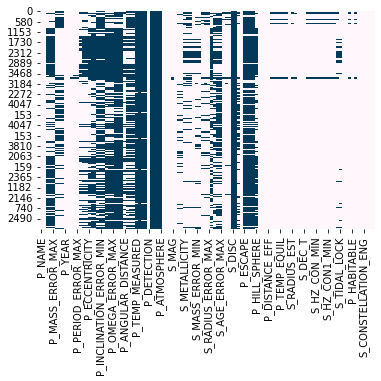

In [18]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

<AxesSubplot:>

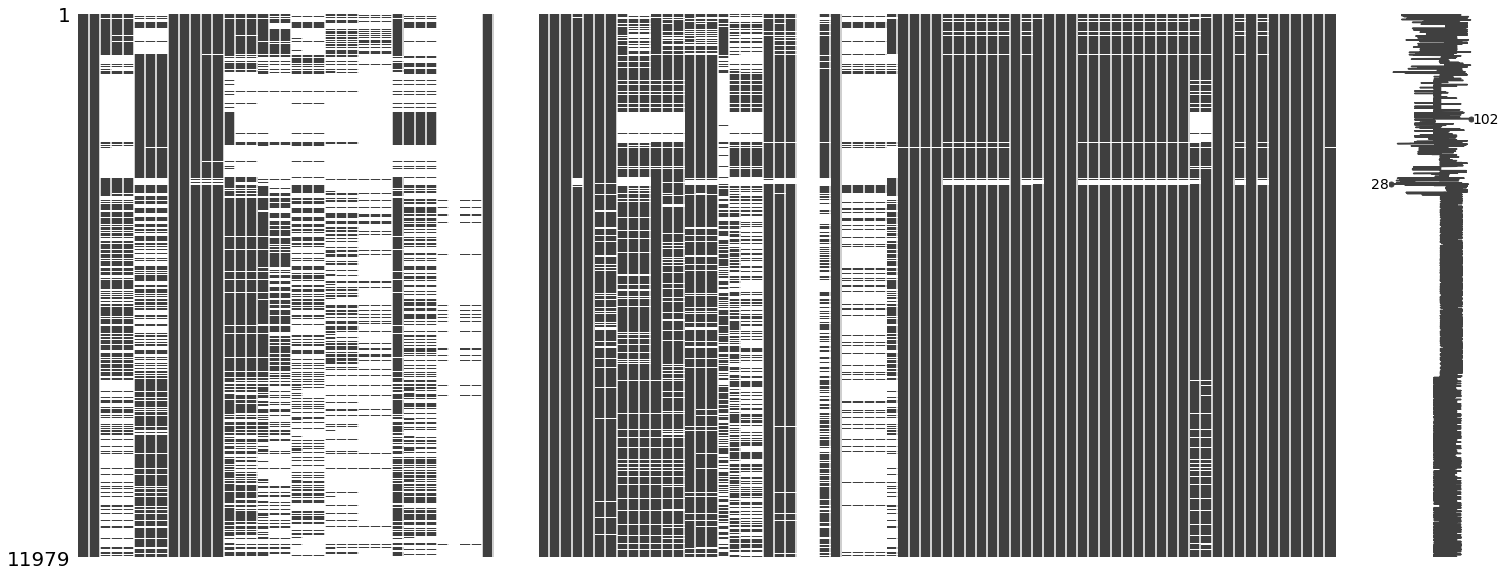

In [19]:
import missingno as msno
msno.matrix(oversampled)

In [20]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)

Total   Percent
P_ALT_NAMES                   11979  1.000000
P_GEO_ALBEDO                  11979  1.000000
S_DISC                        11979  1.000000
P_ATMOSPHERE                  11979  1.000000
S_MAGNETIC_FIELD              11979  1.000000
P_DETECTION_MASS              11979  1.000000
P_DETECTION_RADIUS            11979  1.000000
P_GEO_ALBEDO_ERROR_MAX        11469  0.957425
P_GEO_ALBEDO_ERROR_MIN        11469  0.957425
P_TEMP_MEASURED               11469  0.957425
P_TPERI_ERROR_MAX             10527  0.878788
P_TPERI_ERROR_MIN             10527  0.878788
P_TPERI                       10518  0.878037
P_ESCAPE                      10233  0.854245
P_POTENTIAL                   10233  0.854245
P_GRAVITY                     10233  0.854245
P_DENSITY                     10233  0.854245
P_OMEGA_ERROR_MAX              9094  0.759162
P_OMEGA_ERROR_MIN              9094  0.759162
P_OMEGA                        8747  0.730195
P_INCLINATION_ERROR_MAX        8360  0.697888
P_INCLINATION_ERROR_MIN        8358  0.697721
P_INCLINATION                  8116  0.677519
P_ECCENTRICITY_ERROR_MAX       7429  0.620169
P_ECCENTRICITY_ERROR_MIN       7429  0.620169
S_AGE_ERROR_MAX                7017  0.585775
S_AGE_ERROR_MIN                7017  0.585775
P_IMPACT_PARAMETER_ERROR_MIN   6885  0.574756
P_IMPACT_PARAMETER_ERROR_MAX   6885  0.574756
P_IMPACT_PARAMETER             6790  0.566825
P_MASS_ERROR_MAX               6641  0.554387
P_MASS_ERROR_MIN               6641  0.554387
P_HILL_SPHERE                  6562  0.547792
P_MASS                         6510  0.543451
S_TYPE                         5853  0.488605
P_ECCENTRICITY                 5449  0.454879
S_AGE                          5223  0.436013
P_SEMI_MAJOR_AXIS_ERROR_MIN    4263  0.355873
P_SEMI_MAJOR_AXIS_ERROR_MAX    4262  0.355789
S_LOG_G                        3887  0.324485
P_RADIUS_ERROR_MAX             3774  0.315051
P_RADIUS_ERROR_MIN             3774  0.315051
P_RADIUS                       3740  0.312213
P_ANGULAR_DISTANCE             3004  0.250772
P_SEMI_MAJOR_AXIS              2998  0.250271
S_METALLICITY_ERROR_MIN        2352  0.196344
S_METALLICITY_ERROR_MAX        2352  0.196344
S_MASS_ERROR_MIN               2073  0.173053
S_MASS_ERROR_MAX               2044  0.170632
S_METALLICITY                  1956  0.163286

We notice, from 'P_GEO_ALBEDO' till 'P_MASS' all the features are having > 50% missing values. Hence, we will discard those features to avoid bias.

In [21]:
compact_data = oversampled.drop(['P_GEO_ALBEDO', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_DISC', 'S_MAGNETIC_FIELD', 
                 'P_TEMP_MEASURED', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI', 
                 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX', 
                 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 
                 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 
                 'P_MASS'], axis = 1) 

In [22]:
compact_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  object 
 1   P_STATUS                     11979 non-null  float64
 2   P_RADIUS                     8239 non-null   float64
 3   P_RADIUS_ERROR_MIN           8205 non-null   float64
 4   P_RADIUS_ERROR_MAX           8205 non-null   float64
 5   P_YEAR                       11979 non-null  int64  
 6   P_UPDATED                    11979 non-null  object 
 7   P_PERIOD                     11869 non-null  float64
 8   P_PERIOD_ERROR_MIN           11738 non-null  float64
 9   P_PERIOD_ERROR_MAX           11738 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8981 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7716 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7717 non-null   float64
 13  P_ECCENTRICITY   

The compact data set is having 77 features. Now we will identify the categorical columns which have missing values, and we will impute them first with mode.

In [23]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [24]:
compact_data_obj = compact_data.select_dtypes(include=['object'])

In [25]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

Total   Percent
S_TYPE        5853  0.488605
P_TYPE_TEMP    327  0.027298
S_TYPE_TEMP    136  0.011353
P_TYPE          17  0.001419
P_NAME           0  0.000000

In [26]:
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])

* **Convert Categorical Features to Numerical :**

Now, we will convert the categorical columns to numeric ones using label encoding.

In [27]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

Next, we will impute the missing values for entire data set (actually only the numeric ones, because we imputed the categorical ones using mode earlier) using MICE package. 

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = compact_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)

In [30]:
MiceImputed.head()

P_NAME  P_STATUS  P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR  \
0     0.0       3.0  2.723031           -0.238321            0.310348  2007.0   
1     1.0       3.0  2.723031           -0.238321            0.310348  2009.0   
2     2.0       3.0  2.723031           -0.238321            0.310348  2008.0   
3     3.0       3.0  2.723031           -0.238321            0.310348  2002.0   
4     4.0       3.0  2.723031           -0.238321            0.310348  1996.0   

   P_UPDATED    P_PERIOD  P_PERIOD_ERROR_MIN  P_PERIOD_ERROR_MAX  ...  \
0        0.0   326.03000               -0.32                0.32  ...   
1      146.0   516.21997               -3.20                3.20  ...   
2        0.0   185.84000               -0.23                0.23  ...   
3      146.0  1773.40000               -2.50                2.50  ...   
4      146.0   798.50000               -1.00                1.00  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0            0.0          1.0          0.0  0.083813             24.0   
1            0.0          1.0          0.0  0.082414             83.0   
2            0.0          1.0          0.0  0.081917              0.0   
3            0.0          0.0          0.0  0.145241             39.0   
4            1.0          2.0          0.0  0.368627             30.0   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  \
0                 24.0                  5.0     12.082709  6165.86330   
1                 83.0                 42.0     12.229641  4684.78480   
2                  0.0                  2.0     12.848516  1525.57440   
3                 39.0                 34.0     12.865261  1481.07850   
4                 30.0                 75.0     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 78 columns]

In [31]:
MiceImputed.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

<AxesSubplot:>

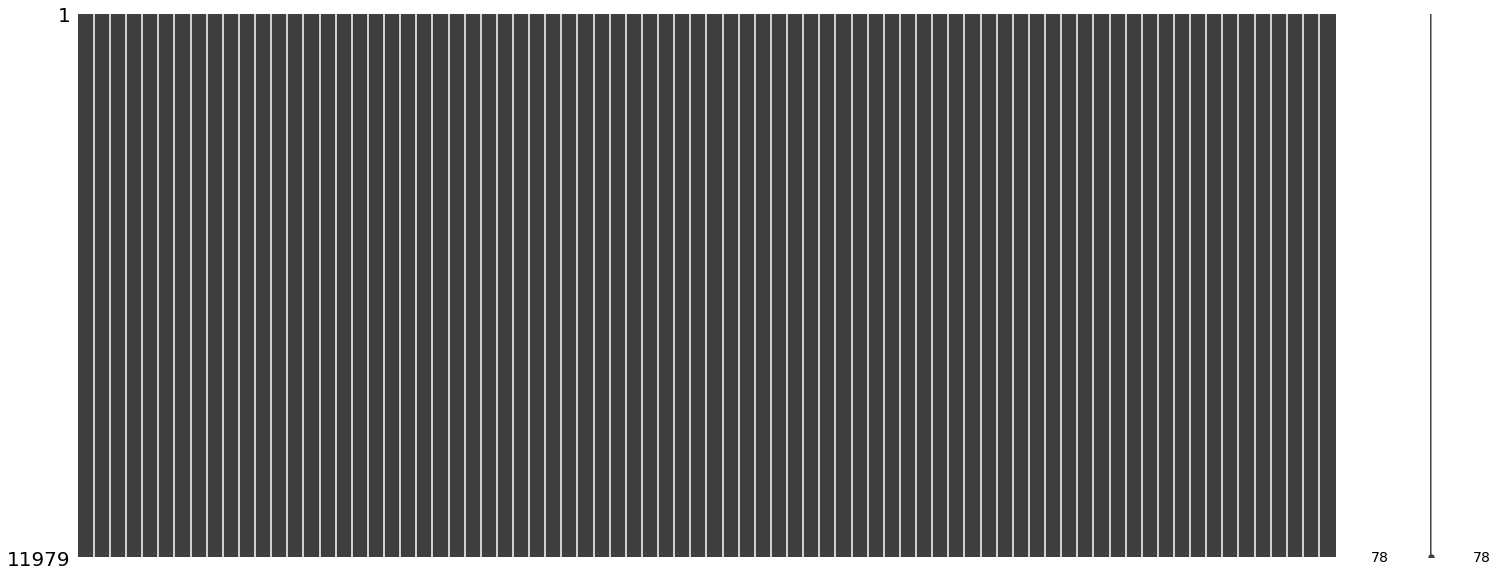

In [32]:
import missingno as msno
msno.matrix(MiceImputed)

* **Removing Multicollinearity :**

Next, we will check whether perfect correlation exists among any feature pair. To avoid multicollinearity, we will exclude one and keep one from those pairs.

<AxesSubplot:>

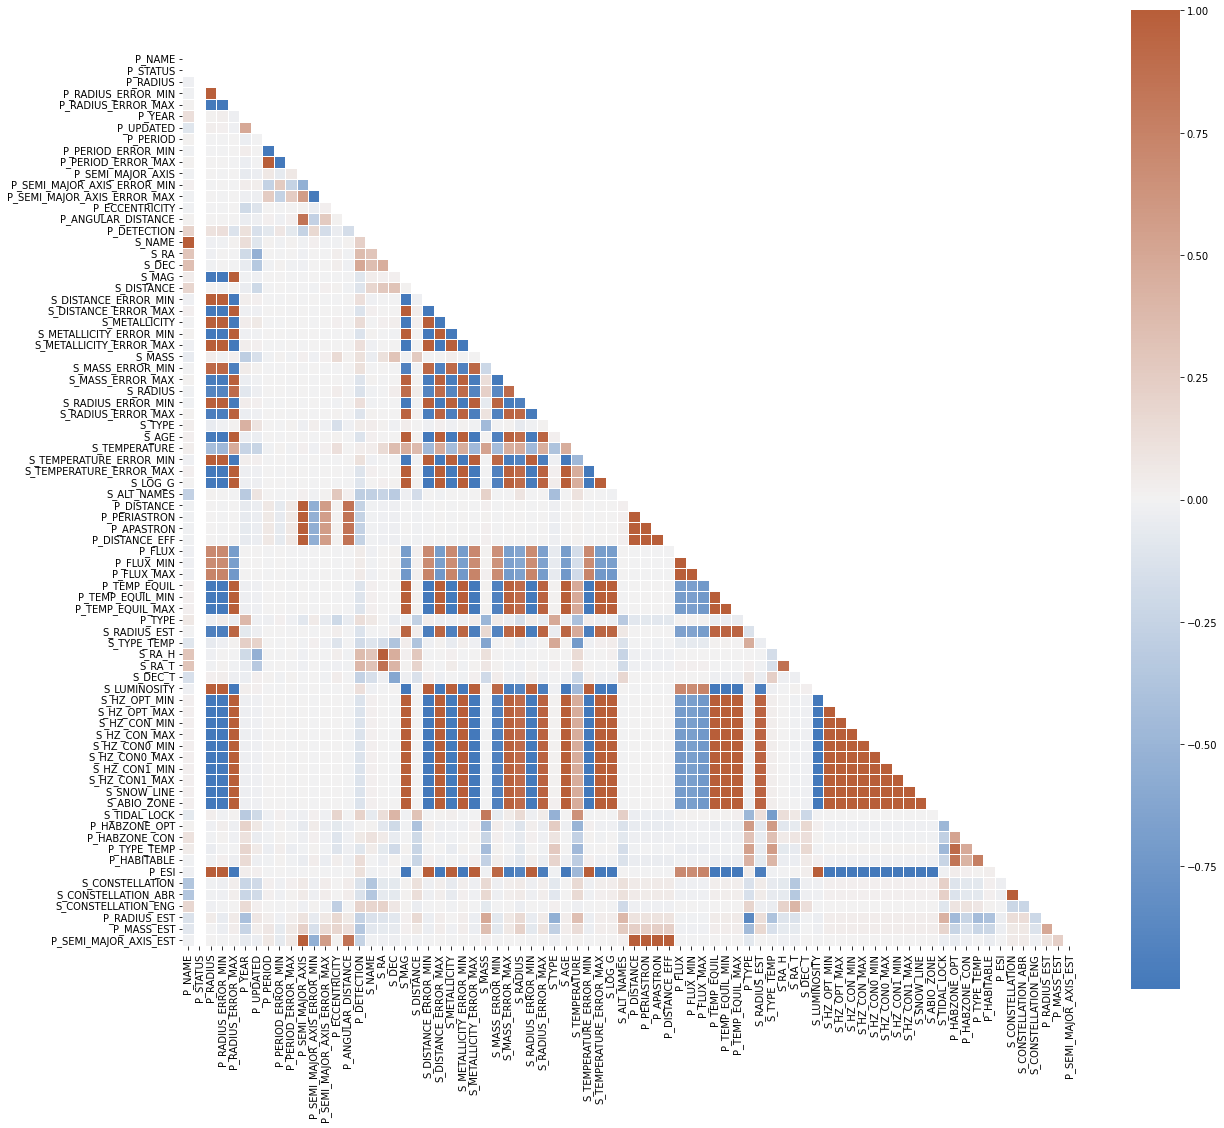

In [33]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

We avoided annotation above to maintain clarity of the image, but the dark red squares are evidence of perfect correlation among the pairs of intersecting features. We will discard them.

In [34]:
#Drop perfectly correlated features
working_data = MiceImputed.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [35]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  float64
 1   P_STATUS                     11979 non-null  float64
 2   P_YEAR                       11979 non-null  float64
 3   P_UPDATED                    11979 non-null  float64
 4   P_PERIOD                     11979 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11979 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11979 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11979 non-null  float64
 8   P_ECCENTRICITY               11979 non-null  float64
 9   P_ANGULAR_DISTANCE           11979 non-null  float64
 10  P_DETECTION                  11979 non-null  float64
 11  S_RA                         11979 non-null  float64
 12  S_DEC                        11979 non-null  float64
 13  S_DISTANCE       

The working data set is having only 36 features at this stage. Now we will cross-check their correlation once again with annotation whether any square comes up with an annotation "1".

<AxesSubplot:>

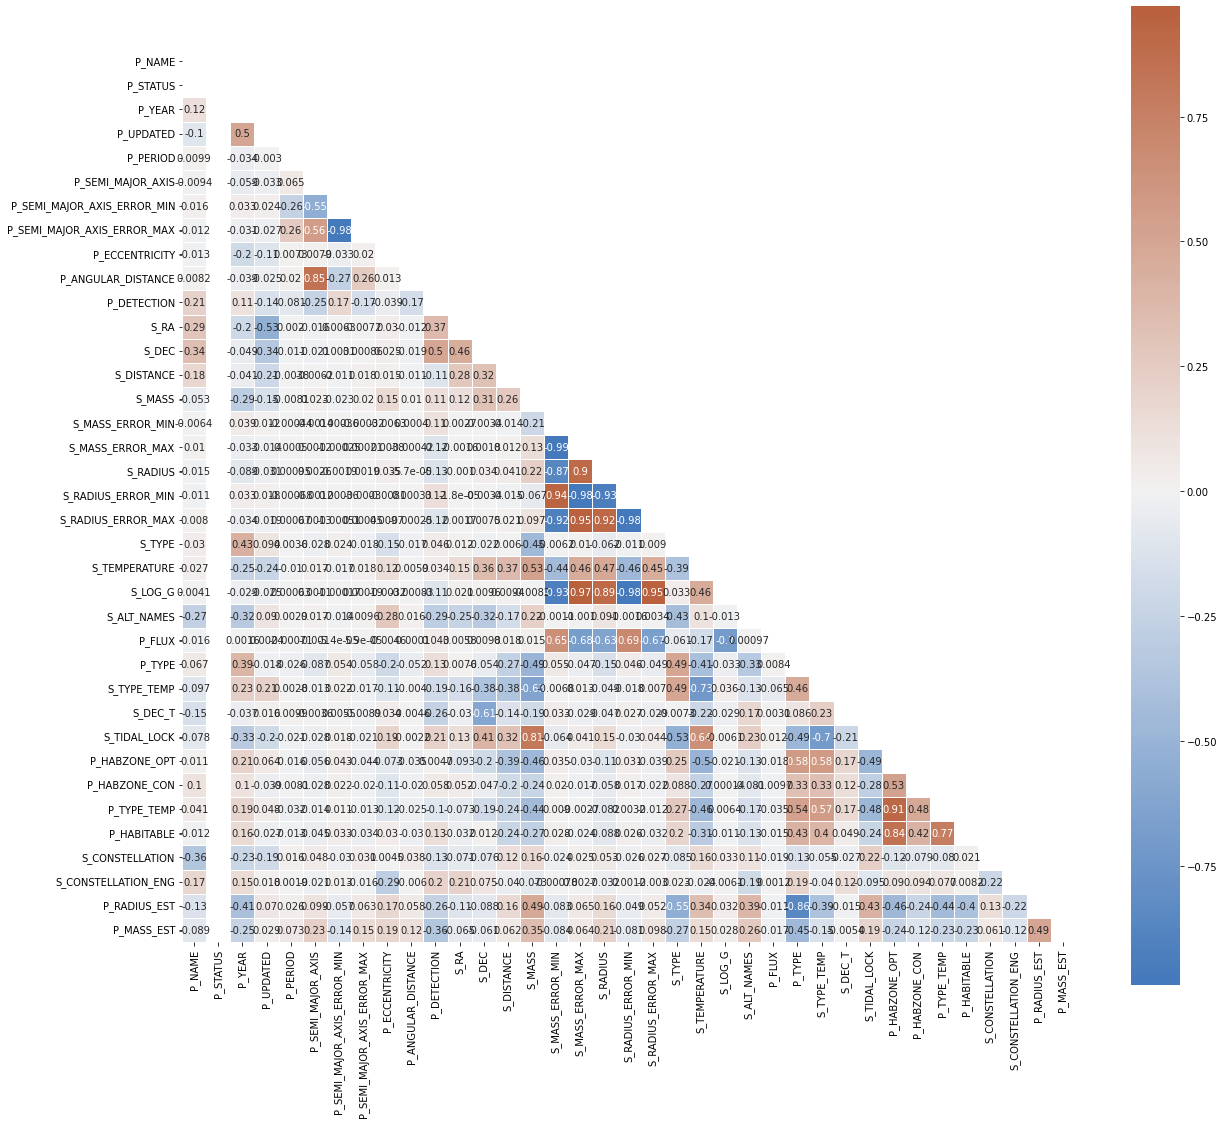

In [36]:
# Correlation Heatmap for reduced working data set
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

Some high correlations are spotted but there is no perfect correlation i.e. "1". 

* **Removal of Outliers :**

Next, we will proceed to identify the outliers using IQR (Inter Quartile Range) and will remove those.

In [37]:
# Detecting outliers with IQR
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                         2150.000000
P_STATUS                          0.000000
P_YEAR                            3.000000
P_UPDATED                        90.000000
P_PERIOD                        101.914721
P_SEMI_MAJOR_AXIS                 1.827347
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.094715
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.101550
P_ECCENTRICITY                    0.049866
P_ANGULAR_DISTANCE               58.917636
P_DETECTION                       1.000000
S_RA                            122.166550
S_DEC                            54.138227
S_DISTANCE                      481.440000
S_MASS                            0.520000
S_MASS_ERROR_MIN                  0.050000
S_MASS_ERROR_MAX                  0.050000
S_RADIUS                          0.540000
S_RADIUS_ERROR_MIN                0.060547
S_RADIUS_ERROR_MAX                0.087495
S_TYPE                            0.000000
S_TEMPERATURE                  1997.530000
S_LOG_G                           0.413547
S_ALT_NAMES

In [38]:
# Removing outliers from dataset
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
import missingno
missingno.matrix

<function missingno.missingno.matrix(df, filter=None, n=0, p=0, sort=None, figsize=(25, 10), width_ratios=(15, 1), color=(0.25, 0.25, 0.25), fontsize=16, labels=None, label_rotation=45, sparkline=True, freq=None, ax=None)>

# Feature Selection :

After completion of data preprocessing, we will select the really important features which are contributing towards habitability of the exoplanets. We will use permutation importance using Random Forest and wrapper method using Random Forest as well as Extra Trees classifier. 

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
pip install eli5

You should consider upgrading via the 'c:\Users\anish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [42]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)

['P_PERIOD', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.00807502 0.         0.00159825 0.00757096 0.02980817 0.01148693
 0.01415279 0.01053405 0.04334575 0.01540115 0.00016531 0.00976828
 0.0330293  0.09481953 0.06080957 0.00422196 0.00346254 0.00387975
 0.00147603 0.00161452 0.         0.04187959 0.01036243 0.
 0.0551828  0.07853786 0.0142459  0.02399169 0.0456951  0.0523036
 0.00420935 0.05160802 0.00119332 0.0008429  0.13633584 0.12839173]


In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(et(n_estimators=100, random_state=123).fit(X,y).feature_importances_)

['P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_TYPE', 'S_TYPE_TEMP', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.02115536 0.         0.00639043 0.00512129 0.02476454 0.022409
 0.04757502 0.02523442 0.06187232 0.00796848 0.01724341 0.01302943
 0.05428342 0.04054109 0.03792335 0.00742641 0.01307266 0.01610923
 0.00662067 0.00698211 0.         0.03658559 0.02081428 0.
 0.03351391 0.11729292 0.0386365  0.01551    0.02628222 0.08025007
 0.01302334 0.05927778 0.00996582 0.00865165 0.05502442 0.04944888]


From the three sets of important features, we will choose the ones which appear repeatedly in more than one method. The chosen ones are really important features.

# Train-Test Split :

In [1]:
features = working_data[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = working_data['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)

# Normalize Features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

NameError: name 'working_data' is not defined

# Modelling with Supervised Learning:

We are using ***one-vs-rest strategy*** for all classifiers for ***multi-class classification*** problem to check which model works best

* Multinomial Naive Bayes

* Gradient Boosting Classifier

In [46]:
# Common function
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, plot_confusion_matrix, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train, verbose=0)
    else:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train)
    y_pred = model_ovr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("Hamming Loss = {}".format(h_loss))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model_ovr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')   
    
    return accuracy, h_loss, coh_kap, time_taken

**[1] Multinomial Naive Bayes :**

Accuracy = 0.8844133099824869
Hamming Loss = 0.11558669001751314
Cohen's Kappa = 0.78631360347015
Time taken = 0.01322484016418457
              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000        87
         1.0    0.99625   0.92188   0.95762       576
         2.0    0.78654   1.00000   0.88051       479

    accuracy                        0.88441      1142
   macro avg    0.59426   0.64062   0.61271      1142
weighted avg    0.83239   0.88441   0.85233      1142



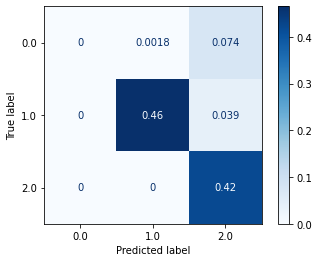

In [47]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
accuracy_mnb, h_loss_mnb, coh_kap_mnb, tt_mnb = run_model(model_mnb, X_train, y_train, X_test, y_test)

**[2] Gradient Boosting Classifier :**

Accuracy = 0.9106830122591943
Hamming Loss = 0.0893169877408056
Cohen's Kappa = 0.8394396017003821
Time taken = 0.31367969512939453
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        87
         1.0    0.84956   1.00000   0.91866       576
         2.0    1.00000   0.78706   0.88084       479

    accuracy                        0.91068      1142
   macro avg    0.94985   0.92902   0.93317      1142
weighted avg    0.92412   0.91068   0.90899      1142



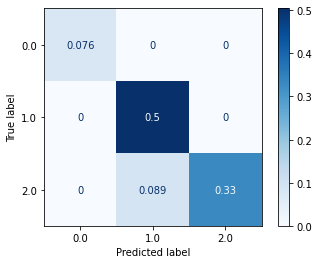

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
params_gb = {'loss':'log_loss', 'learning_rate': 0.1,'criterion': 'squared_error', 'n_estimators': 100, 'max_depth': 20, 'random_state': 12345 }
model_gb = GradientBoostingClassifier(**params_gb)
accuracy_gb, h_loss_gb, coh_kap_gb, tt_gb = run_model(model_gb, X_train, y_train, X_test, y_test)

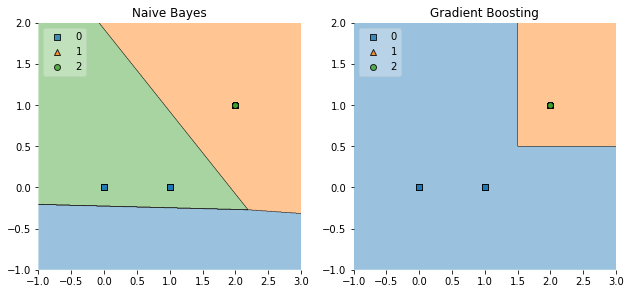

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

value = 1.50
width = 0.75


clf3 = MultinomialNB()


clf6 = GradientBoostingClassifier(n_estimators=1000, random_state=12345, verbose=0)

#Only taking the important planetarial features 
X_list = working_data[["P_TYPE_TEMP", "P_HABZONE_OPT", "P_RADIUS_EST"]] 
X = np.asarray(X_list, dtype=np.float32)
y_list = working_data["P_HABITABLE"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize=(16,10))

labels = [
          'Naive Bayes',
          
          'Gradient Boosting']

for clf, lab, grd in zip([clf3, clf6],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import time


In [51]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
        print "\nModel Report"
        print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
        print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("\nModel Report")? (2641933734.py, line 14)

In [ ]:
y_pred = XGBRegressor.predict(X_test)

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


NameError: name 'y_test' is not defined

In [ ]:
xgb_classifier = xgb.XGBClassifier()



In [ ]:
xgb_classifier.fit(X_train,y_train)

NameError: name 'xgb_classifier' is not defined

In [ ]:
predictions = xgb_classifier.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test, y_pred))

NameError: name 'xgb_classifier' is not defined

In [ ]:
pip install 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement gridspec (from versions: none)
ERROR: No matching distribution found for gridspec
You should consider upgrading via the 'c:\Users\anish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
